In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from prettytable import PrettyTable
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from geneticfs import GeneticFS

In [2]:
data = pd.read_csv('final_cleaned_dataset.csv')

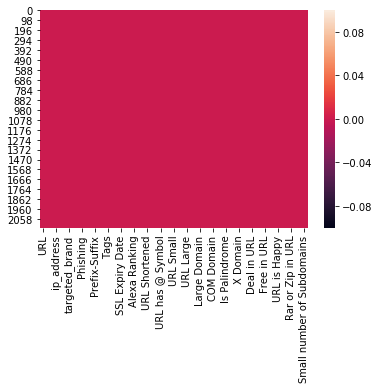

In [9]:
sns.heatmap(pd.isnull(data))

In [10]:
data.columns

Index(['URL', 'embedded_domain_in_path', 'ip_address', 'dictionary_word',
       'targeted_brand', 'ext url', 'Phishing', 'Subdomains', 'Prefix-Suffix',
       'Anchor Tag', 'Tags', 'Forms', 'SSL Expiry Date', 'SSL Cert Check',
       'Alexa Ranking', 'URL Length', 'URL Shortened', 'Redirects User',
       'URL has @ Symbol', 'URL has HTTPS', 'URL Small', 'URL Medium',
       'URL Large', 'Small Domain', 'Large Domain', 'ORG Domain', 'COM Domain',
       'Has PHP Pages', 'Is Palindrome', 'Numbers in Domain', 'X Domain',
       'Vowels in URL', 'Deal in URL', 'Download in URL', 'Free in URL',
       'BJKT in URL', 'URL is Happy', 'Just Why', 'Rar or Zip in URL',
       'Large number of Subdomains', 'Small number of Subdomains'],
      dtype='object')

In [11]:
len(data.columns)

41

In [3]:
data['Phishing'].replace('yes',1, inplace=True)
data['Phishing'].replace('no',0, inplace=True)

In [4]:
numerical_features = ['Subdomains', 'Anchor Tag', 'SSL Expiry Date', 'Alexa Ranking', 'URL Length', 'Vowels in URL']

In [5]:
data.drop(['Tags'],axis=1,inplace=True)

In [6]:
for col in numerical_features:
    data[col] = scale(data[col].values)

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int

In [7]:
data.head()

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,...,Vowels in URL,Deal in URL,Download in URL,Free in URL,BJKT in URL,URL is Happy,Just Why,Rar or Zip in URL,Large number of Subdomains,Small number of Subdomains
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,1,-1,-1,1,0.284342,-1,0.937982,...,0.759499,-1,-1,-1,-1,1,1,-1,-1,-1
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,0,-0.989844,1,-0.666334,...,2.197964,-1,-1,-1,-1,1,1,-1,-1,1
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,1,0.284342,1,0.860532,...,-0.402337,-1,-1,-1,-1,-1,1,-1,-1,-1
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,0,0.284342,1,-0.721656,...,-0.125709,-1,-1,-1,-1,-1,1,-1,-1,-1
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,1,-1,1,0.284342,1,0.937982,...,-0.236360,-1,-1,-1,-1,-1,1,-1,-1,-1


In [8]:
y = data['Phishing'].values

In [9]:
data.drop(['Phishing'], axis=1, inplace=True)

In [10]:
data.drop(['URL'],axis=1,inplace=True)

In [11]:
data.columns

Index(['embedded_domain_in_path', 'ip_address', 'dictionary_word',
       'targeted_brand', 'ext url', 'Subdomains', 'Prefix-Suffix',
       'Anchor Tag', 'Forms', 'SSL Expiry Date', 'SSL Cert Check',
       'Alexa Ranking', 'URL Length', 'URL Shortened', 'Redirects User',
       'URL has @ Symbol', 'URL has HTTPS', 'URL Small', 'URL Medium',
       'URL Large', 'Small Domain', 'Large Domain', 'ORG Domain', 'COM Domain',
       'Has PHP Pages', 'Is Palindrome', 'Numbers in Domain', 'X Domain',
       'Vowels in URL', 'Deal in URL', 'Download in URL', 'Free in URL',
       'BJKT in URL', 'URL is Happy', 'Just Why', 'Rar or Zip in URL',
       'Large number of Subdomains', 'Small number of Subdomains'],
      dtype='object')

In [12]:
all_X_cols = data.columns.values

In [13]:
all_X = data[all_X_cols]

In [14]:
#KNN


In [15]:
X_train, X_test, y_train, y_test = train_test_split( all_X, y, test_size=0.30, random_state=0)

In [16]:
def knn_kfold_validation(neighbours, X_train, y_train, algo='auto'):
    cv_scores=[]
    for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
        cv_scores.append(scores.mean())
        print("K : %d , Score : %f" % (k,scores.mean()))
    return cv_scores

def optimal_k_plot(neighbours, cv_scores):    
    optimal_k = neighbours[cv_scores.index(max(cv_scores))]
    plt.plot(neighbours, cv_scores)
    for xy in zip(neighbours,np.round(cv_scores,2)):
        plt.annotate("('%s',%s)"% xy, xy=xy, textcoords='data')
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('CV_Scores')
    print("CV_SCORES: ",cv_scores)
    return optimal_k

def optimal_knn(optimal_k, X_train, X_test, y_train, y_test, algo='auto'):
    # ============================== KNN with k = optimal_k ===============================================
    # instantiate learning model k = optimal_k
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm = algo)

    # fitting the model
    knn_optimal.fit(X_train, y_train)

    # predict the response
    pred = knn_optimal.predict(X_test)

    # evaluate accuracy
    acc = accuracy_score(y_test, pred) * 100
    print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
    
    return pred

def gen_confusion_matrix(y_test,pred):
    print(sns.heatmap(confusion_matrix(y_test,pred),cmap="viridis",fmt='g', annot=True))
    
def gen_scores(y_test, pred):
    gen_confusion_matrix(y_test,pred)
    pre = np.round(precision_score(y_test,pred,average='weighted'),4)
    recall = np.round(recall_score(y_test,pred,average='weighted'),4)
    f1 = np.round(f1_score(y_test,pred,average='weighted'),4)
    accuracy = np.round(accuracy_score(y_test,pred),4)
    table = PrettyTable()
    table.field_names = ['Precision Score', 'Recall Score', 'f1 Score', 'Accuracy']
    table.add_row([pre,recall,f1,accuracy])
    print(table)

In [17]:
neighbours = list(range(1,41,2))

In [18]:
cv_scores = knn_kfold_validation(neighbours, X_train, y_train)

K : 1 , Score : 0.904615
K : 3 , Score : 0.913287
K : 5 , Score : 0.915284
K : 7 , Score : 0.913280
K : 9 , Score : 0.909942
K : 11 , Score : 0.898609
K : 13 , Score : 0.899946
K : 15 , Score : 0.893280
K : 17 , Score : 0.895944
K : 19 , Score : 0.895949
K : 21 , Score : 0.892613
K : 23 , Score : 0.895280
K : 25 , Score : 0.893951
K : 27 , Score : 0.892618
K : 29 , Score : 0.888618
K : 31 , Score : 0.884618
K : 33 , Score : 0.886615
K : 35 , Score : 0.884615
K : 37 , Score : 0.878613
K : 39 , Score : 0.876613


CV_SCORES:  [0.9046153846153846, 0.9132865105908584, 0.9152842809364549, 0.9132798216276476, 0.9099420289855071, 0.8986086956521738, 0.8999464882943145, 0.8932798216276477, 0.8959442586399108, 0.895948717948718, 0.892613154960981, 0.8952798216276477, 0.8939509476031215, 0.8926176142697884, 0.8886176142697881, 0.8846176142697881, 0.8866153846153846, 0.8846153846153847, 0.8786131549609809, 0.876613154960981]


5

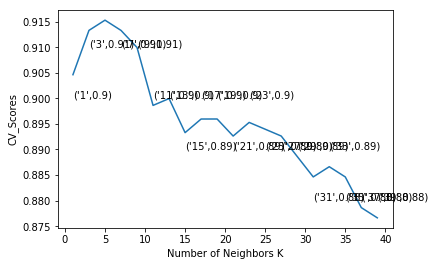

In [110]:
optimal_k_plot(neighbours,cv_scores)

In [111]:
optimal_k=5

In [112]:
pred = optimal_knn(optimal_k,X_train, X_test, y_train, y_test)


The accuracy of the knn classifier for k = 5 is 92.690513%


AxesSubplot(0.125,0.125;0.62x0.755)
+-----------------+--------------+----------+----------+
| Precision Score | Recall Score | f1 Score | Accuracy |
+-----------------+--------------+----------+----------+
|      0.927      |    0.9269    |  0.9269  |  0.9269  |
+-----------------+--------------+----------+----------+


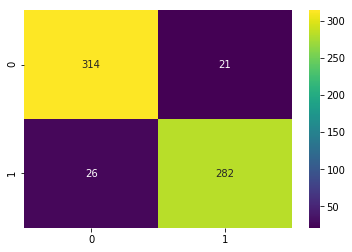

In [119]:
gen_scores(y_test, pred)

Iteration 10 Complete [Time Taken For Last Iteration: 9.79 Seconds]
Iteration 20 Complete [Time Taken For Last Iteration: 6.86 Seconds]
Iteration 30 Complete [Time Taken For Last Iteration: 7.62 Seconds]
Iteration 40 Complete [Time Taken For Last Iteration: 7.12 Seconds]
Iteration 50 Complete [Time Taken For Last Iteration: 7.54 Seconds]
Iteration 60 Complete [Time Taken For Last Iteration: 6.69 Seconds]
Iteration 70 Complete [Time Taken For Last Iteration: 6.86 Seconds]
Iteration 80 Complete [Time Taken For Last Iteration: 6.99 Seconds]
Iteration 90 Complete [Time Taken For Last Iteration: 3.27 Seconds]
Iteration 100 Complete [Time Taken For Last Iteration: 3.73 Seconds]


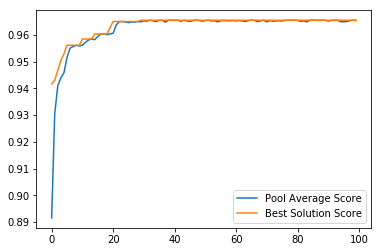

In [120]:



gen_model = KNeighborsClassifier(n_neighbors=optimal_k)
gfs = GeneticFS()

# fit the optimizer
gfs.fit(model=gen_model, _type='classification', X=all_X, y=y) # classification model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfs.results()

# plot results of progress
gfs.plot_progress()

In [121]:
binary_output_of_optimal_variables

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [122]:
len(data.columns)

38

In [127]:
reduced_cols = list(all_X.columns[indicies_of_optimal_variables])

In [133]:
#reduced_cols.remove('Is Palindrome')
#reduced_cols.remove('BJKT in URL')
#reduced_cols.remove('Just Why')

In [134]:
reduced_X = all_X[reduced_cols]

In [135]:
reduced_X.columns

Index(['embedded_domain_in_path', 'ip_address', 'Subdomains', 'Anchor Tag',
       'Forms', 'SSL Expiry Date', 'SSL Cert Check', 'Redirects User',
       'URL has @ Symbol', 'URL Small', 'ORG Domain', 'COM Domain', 'X Domain',
       'Vowels in URL', 'Download in URL', 'Free in URL', 'Rar or Zip in URL',
       'Large number of Subdomains'],
      dtype='object')

In [136]:
X_train, X_test, y_train, y_test = train_test_split( reduced_X, y, test_size=0.30, random_state=0)

In [137]:
cv_scores = knn_kfold_validation(neighbours, X_train, y_train)

K : 1 , Score : 0.956647
K : 3 , Score : 0.956649
K : 5 , Score : 0.955978
K : 7 , Score : 0.950633
K : 9 , Score : 0.941291
K : 11 , Score : 0.933291
K : 13 , Score : 0.929955
K : 15 , Score : 0.924624
K : 17 , Score : 0.917291
K : 19 , Score : 0.915955
K : 21 , Score : 0.911287
K : 23 , Score : 0.909284
K : 25 , Score : 0.910618
K : 27 , Score : 0.911949
K : 29 , Score : 0.911949
K : 31 , Score : 0.907944
K : 33 , Score : 0.910611
K : 35 , Score : 0.911275
K : 37 , Score : 0.909942
K : 39 , Score : 0.910606


CV_SCORES:  [0.9566465997770346, 0.9566488294314383, 0.9559777034559644, 0.950633221850613, 0.9412909698996655, 0.9332909698996655, 0.9299554069119287, 0.9246243032329989, 0.9172909698996655, 0.9159554069119287, 0.9112865105908584, 0.9092842809364547, 0.9106176142697884, 0.911948717948718, 0.911948717948718, 0.9079442586399109, 0.9106109253065775, 0.9112753623188405, 0.9099420289855071, 0.9106064659977704]


3

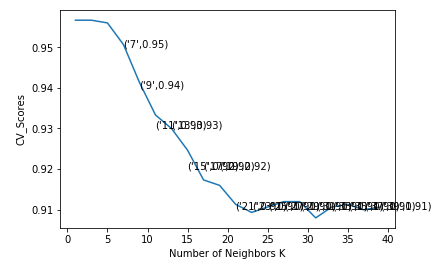

In [138]:
optimal_k_plot(neighbours,cv_scores)

In [141]:
pred = optimal_knn(3,X_train, X_test, y_train, y_test)


The accuracy of the knn classifier for k = 3 is 95.956454%


AxesSubplot(0.125,0.125;0.62x0.755)
+-----------------+--------------+----------+----------+
| Precision Score | Recall Score | f1 Score | Accuracy |
+-----------------+--------------+----------+----------+
|      0.9599     |    0.9596    |  0.9596  |  0.9596  |
+-----------------+--------------+----------+----------+


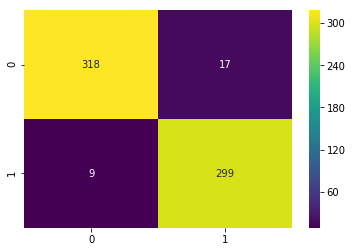

In [142]:
gen_scores(y_test, pred)

In [143]:
#Naive Bayes

In [145]:
X_train, X_test, y_train, y_test = train_test_split( all_X, y, test_size=0.30, random_state=0)

In [152]:
gnb = GaussianNB()

In [153]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [154]:
pred = gnb.predict(X_test)

AxesSubplot(0.125,0.125;0.62x0.755)
+-----------------+--------------+----------+----------+
| Precision Score | Recall Score | f1 Score | Accuracy |
+-----------------+--------------+----------+----------+
|      0.7603     |    0.6579    |  0.6277  |  0.6579  |
+-----------------+--------------+----------+----------+


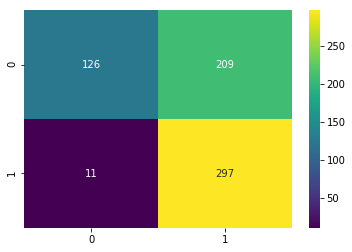

In [155]:
gen_scores(y_test, pred)

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 10 Complete [Time Taken For Last Iteration: 0.36 Seconds]
Iteration 20 Complete [Time Taken For Last Iteration: 0.36 Seconds]
Iteration 30 Complete [Time Taken For Last Iteration: 0.38 Seconds]
Iteration 40 Complete [Time Taken For Last Iteration: 0.39 Seconds]
Iteration 50 Complete [Time Taken For Last Iteration: 0.37 Seconds]
Iteration 60 Complete [Time Taken For Last Iteration: 0.36 Seconds]
Iteration 70 Complete [Time Taken For Last Iteration: 0.38 Seconds]
Iteration 80 Complete [Time Taken For Last Iteration: 0.39 Seconds]
Iteration 90 Complete [Time Taken For Last Iteration: 0.42 Seconds]
Iteration 100 Complete [Time Taken For Last Iteration: 0.4 Seconds]


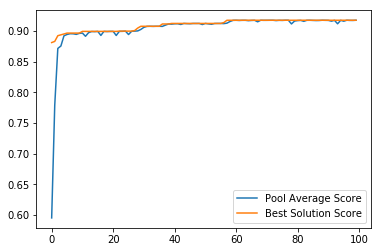

In [156]:
gen_model = GaussianNB()
gfs = GeneticFS()

# fit the optimizer
gfs.fit(model=gen_model, _type='classification', X=all_X, y=y) # classification model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfs.results()

# plot results of progress
gfs.plot_progress()

In [157]:
reduced_cols = list(all_X.columns[indicies_of_optimal_variables])

In [161]:
#reduced_cols.remove('Is Palindrome')
#reduced_cols.remove('Vowels in URL')
#reduced_cols.remove('BJKT in URL')
#reduced_cols.remove('URL is Happy')
#reduced_cols.remove('Just Why')

In [164]:
reduced_X = all_X[reduced_cols]

In [165]:
X_train, X_test, y_train, y_test = train_test_split( reduced_X, y, test_size=0.30, random_state=0)

In [166]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

AxesSubplot(0.125,0.125;0.62x0.755)
+-----------------+--------------+----------+----------+
| Precision Score | Recall Score | f1 Score | Accuracy |
+-----------------+--------------+----------+----------+
|      0.9167     |    0.916     |  0.9159  |  0.916   |
+-----------------+--------------+----------+----------+


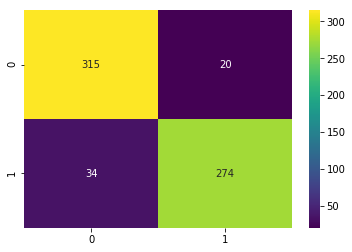

In [167]:
gen_scores(y_test, pred)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
def apply_RF(X_train, y_train):
    tree_list = [10,20,30,40,50,60,70,80,90,100]
    
    cv_scores=[]
    for trees in tree_list:
        scores = cross_val_score(RandomForestClassifier(n_estimators=trees), X_train, y_train, scoring="accuracy", cv=5)
        cv_scores.append(scores.mean())
        print("TREES : %f , Score : %f" % (trees,scores.mean()))
    
    op_index = cv_scores.index(max(cv_scores))
    op_trees = tree_list[op_index]
    print("Optimum Trees",op_trees)
    print(plt.plot(tree_list,cv_scores,marker='o',linestyle="dashed"))
    return op_trees

In [15]:
X_train, X_test, y_train, y_test = train_test_split( all_X, y, test_size=0.30, random_state=0)

TREES : 10.000000 , Score : 0.986660
TREES : 20.000000 , Score : 0.992664
TREES : 30.000000 , Score : 0.990662
TREES : 40.000000 , Score : 0.992662
TREES : 50.000000 , Score : 0.991331
TREES : 60.000000 , Score : 0.992664
TREES : 70.000000 , Score : 0.993998
TREES : 80.000000 , Score : 0.991998
TREES : 90.000000 , Score : 0.993998
TREES : 100.000000 , Score : 0.989998
Optimum Trees 70


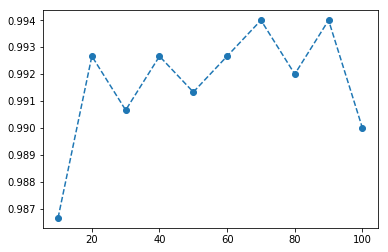

In [16]:
op_trees = apply_RF(X_train, y_train)

In [17]:
rf_model = RandomForestClassifier(n_estimators=70)

In [18]:
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

AxesSubplot(0.125,0.125;0.62x0.755)
+-----------------+--------------+----------+----------+
| Precision Score | Recall Score | f1 Score | Accuracy |
+-----------------+--------------+----------+----------+
|      0.9938     |    0.9938    |  0.9938  |  0.9938  |
+-----------------+--------------+----------+----------+


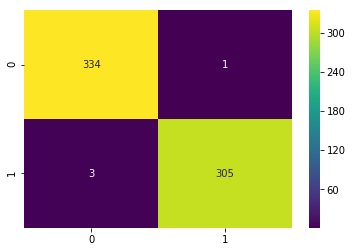

In [21]:
gen_scores(y_test, pred)

In [ ]:
gen_model = RandomForestClassifier(n_estimators=250)
gfs = GeneticFS()

# fit the optimizer
gfs.fit(model=gen_model, _type='classification', X=all_X, y=y) # classification model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfs.results()

# plot results of progress
gfs.plot_progress()

In [22]:
# Genetic Consumes like infinite amount of time

In [ ]:
# Highl overfitting - not good for production - High accuracies because the dataset used is a small one

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.svm import SVC

In [28]:
X_train, X_test, y_train, y_test = train_test_split( all_X, y, test_size=0.30, random_state=0)

In [31]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

In [32]:
clf = GridSearchCV(SVC(gamma='scale'), parameters, cv=5)

In [34]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
pred = clf.predict(X_test)

AxesSubplot(0.125,0.125;0.62x0.755)
+-----------------+--------------+----------+----------+
| Precision Score | Recall Score | f1 Score | Accuracy |
+-----------------+--------------+----------+----------+
|      0.9518     |    0.9518    |  0.9518  |  0.9518  |
+-----------------+--------------+----------+----------+


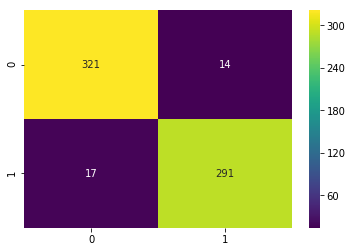

In [36]:
gen_scores(y_test, pred)

In [ ]:
gen_model = GridSearchCV(SVC(gamma='scale'), parameters, cv=5)
gfs = GeneticFS()

# fit the optimizer
gfs.fit(model=gen_model, _type='classification', X=all_X, y=y) # classification model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfs.results()

# plot results of progress
gfs.plot_progress()

In [25]:
reduced_X_cols = ['embedded_domain_in_path', 'ip_address','Subdomains', 'Anchor Tag', 'Forms', 'SSL Expiry Date', 'SSL Cert Check', 'Redirects User',
       'URL has @ Symbol', 'URL has HTTPS', 'URL Small','Download in URL', 'Rar or Zip in URL']

In [26]:
reduced_X = all_X[reduced_X_cols]

In [27]:
X_train, X_test, y_train, y_test = train_test_split( reduced_X, y, test_size=0.30, random_state=0)

In [28]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

In [32]:
clf = GridSearchCV(SVC(gamma='scale'), parameters, cv=5)

In [33]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
pred = clf.predict(X_test)

AxesSubplot(0.125,0.125;0.62x0.755)
+-----------------+--------------+----------+----------+
| Precision Score | Recall Score | f1 Score | Accuracy |
+-----------------+--------------+----------+----------+
|      0.9693     |    0.9689    |  0.9689  |  0.9689  |
+-----------------+--------------+----------+----------+


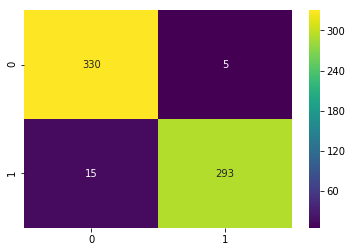

In [35]:
gen_scores(y_test, pred)